In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats
import statistics
# Gathering diabetes the data
diabetesDataFrame = pd.read_excel('2018_diabetes_data.xlsx')
diabetesDataFrame = diabetesDataFrame.sort_values(
        '%diabetes', ascending=True)
print("--------------2018-----Diabetes-----------------")
print(diabetesDataFrame.head(5))
diabetesArray = np.array(diabetesDataFrame['%diabetes'])
diabetesList = list(diabetesArray)
obesityDataFrame = pd.read_excel('2016_obesity_data.xlsx')
obesityDataFrame = obesityDataFrame.sort_values('% OBESE', ascending=True)
print("--------------2016------Obesity----------------")
print(obesityDataFrame.head(5))
obesityArray = np.array(obesityDataFrame['% OBESE'])
obesityList = list(obsesityArray)    
inactivityDataFrame = pd.read_excel('2016_inactivity_data.xlsx')
inactivityDataFrame = inactivityDataFrame.sort_values(
        '% INACTIVE', ascending=True)
print("--------------2016---------Inactivity-------------")
print(inactivityDataFrame.head(5))
inactivityArray = np.array(inactivityDataFrame['% INACTIVE'])
inactivityList = list(inactivityArray)

--------------2018-----Diabetes-----------------
      YEAR   FIPS           COUNTY      STATEW  %diabetes
3138  2018  56039     Teton County     Wyoming        3.8
2980  2018  53055  San Juan County  Washington        4.5
2798  2018  49043    Summit County        Utah        4.8
1613  2018  30031  Gallatin County     Montana        5.0
1336  2018  27045  Fillmore County   Minnesota        5.0
--------------2016------Obesity----------------
   Year  County_FIPS         County     State  % OBESE  Overall SVI
0  2016      56039.0   Teton County   Wyoming     11.4       0.0764
1  2016       8037.0   Eagle County  Colorado     13.1       0.1487
2  2016       8117.0  Summit County  Colorado     13.4       0.0720
3  2016       8097.0  Pitkin County  Colorado     13.8       0.0579
4  2016      49043.0  Summit County      Utah     14.0       0.0694
--------------2016---------Inactivity-------------
   Year  County_FIPS            County       State  % INACTIVE  Overall SVI
0  2016         8013

In [41]:
# Finding common FIPS
# Find common counties(FIPS) in both the data
diabetesDataFrame = pd.read_excel('2018_diabetes_data.xlsx')
diabArray = np.array(diabetesDataFrame)
diabetesList = list(diabArray)

inactivityDataFrame = pd.read_excel('2016_inactivity_data.xlsx')
inactArray = np.array(inactivityDataFrame)
inactivityList = list(inactArray)

inactivityArray = []
diabetesArray = []
for fpsInactivity in inactivityList:
    for fpsDiabetes in diabetesList:
        if fpsDiabetes[1] == fpsInactivity[1]:
            inactivityArray.append(fpsInactivity[4])
            diabetesArray.append(fpsDiabetes[4])
print("Length of Inactivity Array",len(inactivityArray))
print("Length of diabetes Array",len(diabetesArray))

Length of Inactivity Array 3142
Length of diabetes Array 3142


In [44]:
print("Inactivity Mean",sum(inactivityArray)/len(inactivityArray));
print("Inactivity Median",statistics.median(inactivityArray));
print("Inactivity Standard Deviation",statistics.stdev(inactivityArray));
print("Inactivity Skew",scipy.stats.skew(inactivityArray));
scipy.stats.kurtosis(inactivityArray, fisher=True)

mean = np.mean(inactivityArray)
std_dev = np.std(inactivityArray)

# Calculate kurtosis using the formula
n = len(inactivityArray)
kurtosis = (np.sum((inactivityArray - mean)**4) / (n * std_dev**4)) - 3
print("Inactivity kurtosis",kurtosis)

Inactivity Mean 20.466900063653718
Inactivity Median 20.0
Inactivity Standard Deviation 4.540912311952216
Inactivity Skew 0.5107313509196658
Inactivity kurtosis 0.0009204960310098542


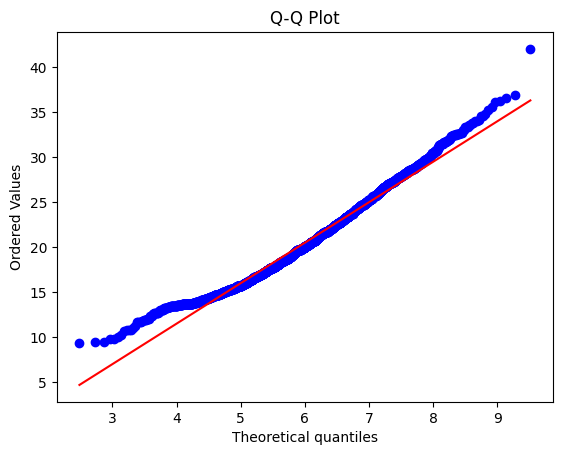

In [45]:
# qq plot for diabetes and inactivity
import matplotlib.pyplot as plt
from scipy import stats

# Create the Q-Q plot
stats.probplot(inactivityArray, dist=stats.norm(loc=6, scale=1),plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [46]:
# Checking correlation between %diabetes and %Inactivity
import numpy as np
from scipy import stats



# Calculate the Pearson correlation coefficient (r) using numpy
correlation_coefficient = np.corrcoef(diabetesArray, inactivityArray)[0, 1]

# Calculate the correlation coefficient and p-value using scipy
correlation, p_value = stats.pearsonr(diabetesArray, inactivityArray)

# Display the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("Pearson Correlation Coefficient (with p-value):", correlation)
print("p-value:", p_value)

# Interpret the correlation strength
if abs(correlation) < 0.3:
    print("The correlation is weak.")
elif 0.3 <= abs(correlation) < 0.7:
    print("The correlation is moderate.")
else:
    print("The correlation is strong.")

Pearson Correlation Coefficient: 0.6812783224613382
Pearson Correlation Coefficient (with p-value): 0.6812783224613389
p-value: 0.0
The correlation is moderate.


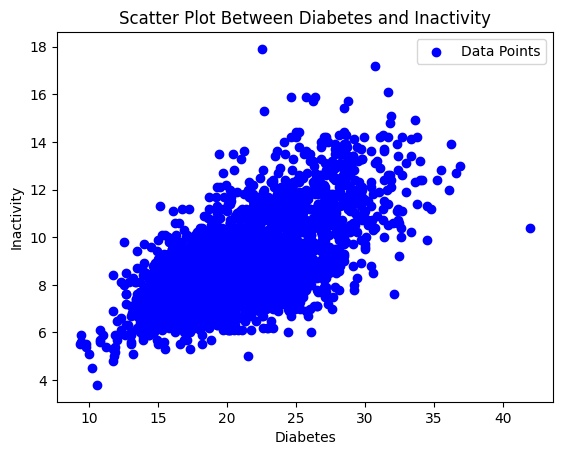

In [48]:
# Create a scatter plot between %diabetes and %inactivity
plt.scatter(inactivityArray, diabetesArray, c='blue', marker='o', label='Data Points')

# Add labels and a title
plt.xlabel('Diabetes')
plt.ylabel('Inactivity')
plt.title('Scatter Plot Between Diabetes and Inactivity')


# plt.ylim(2, 12)
# Add a legend (if needed)
plt.legend()

# Display the plot
plt.show()

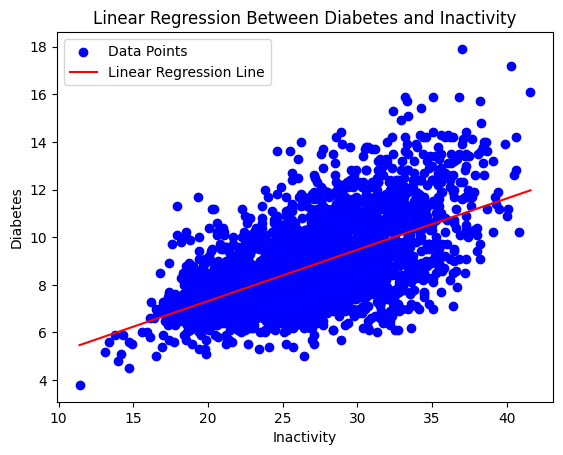

In [84]:
# Create a scatter plot between %diabetes and %inactivity
plt.scatter(inactivityArray, diabetesArray, c='blue', marker='o', label='Data Points')

slope, intercept = np.polyfit(inactivityArray, diabetesArray, 1)

# Add a linear regression line
regression_line = [slope * x + intercept for x in inactivityArray]
plt.plot(inactivityArray, regression_line, color='red', label='Linear Regression Line')

# Add labels and a title
plt.xlabel('Inactivity')
plt.ylabel('Diabetes')
plt.title('Linear Regression Between Diabetes and Inactivity')
# Add a legend (if needed)
plt.legend()

# Display the plot
plt.show()

In [50]:
# Calculate r square value's

# it is important to convert normal array's to numpy's array
inactivityArray = np.array(inactivityArray)
diabetesArray = np.array(diabetesArray)



slope, intercept = np.polyfit(inactivityArray, diabetesArray, 1)



# Calculate the predicted values
predicted_values = [slope * x + intercept for x in inactivityArray]

# Calculate the residuals
residuals = diabetesArray - predicted_values

# Calculate the total sum of squares (TSS)
mean_array2 = np.mean(diabetesArray)
TSS = np.sum((diabetesArray - mean_array2) ** 2)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((diabetesArray - predicted_values) ** 2)

# Calculate R-squared (coefficient of determination)
R_squared = 1 - (RSS / TSS)
print(R_squared)

0.46414015265573527


In [65]:
# Finding common FIPS
# Find common counties(FIPS) in both the data
diabetesDataFrame = pd.read_excel('2018_diabetes_data.xlsx')
diabArray = np.array(diabetesDataFrame)
diabetesList = list(diabArray)

obesityDataFrame = pd.read_excel('2016_obesity_data.xlsx')
obesityArray = np.array(obesityDataFrame)
obesityList = list(obesityArray)
# print(obesityList)
obesityArray = []
diabetesArray = []
for fpsObesity in obesityList:
    for fpsDiabetes in diabetesList:
        if fpsDiabetes[1] == fpsObesity[1]:
            obesityArray.append(fpsObesity[4])
            diabetesArray.append(fpsDiabetes[4])
print("Length of Obesity Array",len(obesityArray))
print("Length of Diabetes Array",len(diabetesArray))

Length of Obesity Array 3142
Length of Diabetes Array 3142


In [69]:
print("Obesity Mean",sum(obesityArray)/len(obesityArray));
print("Obesity Median",statistics.median(obesityArray));
print("Obesity Standard Deviation",statistics.stdev(obesityArray));
print("Obesity Skew",scipy.stats.skew(obesityArray));
scipy.stats.kurtosis(obesityArray, fisher=True)

mean = np.mean(obesityArray)
std_dev = np.std(obesityArray)

# Calculate kurtosis using the formula
n = len(obesityArray)
kurtosis = (np.sum((obesityArray - mean)**4) / (n * std_dev**4)) - 3
print("Obesity kurtosis",kurtosis)

Obesity Mean 26.506810948440467
Obesity Median 26.7
Obesity Standard Deviation 5.066922850988987
Obesity Skew 0.07522306371410656
Obesity kurtosis -0.5687516808977806


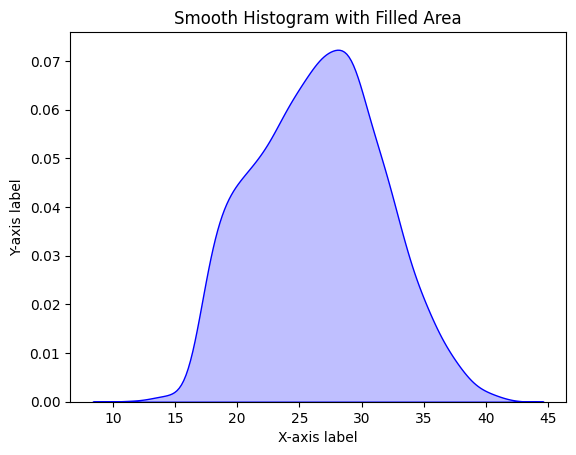

In [70]:
# Create a smooth histogram with a filled area
# plt.figure(figsize=(8, 6))
sns.kdeplot(obesityArray, color='blue', fill=True)


# Customize the plotx
plt.title('Smooth Histogram with Filled Area')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the plot
plt.show()

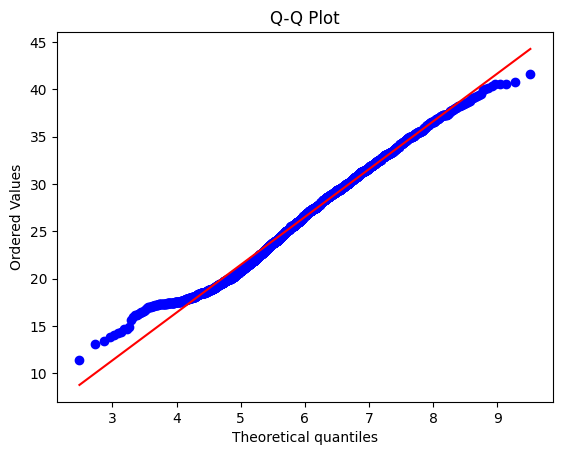

In [71]:
# qq plot for diabetes and inactivity
import matplotlib.pyplot as plt
from scipy import stats

# Create the Q-Q plot
stats.probplot(obesityArray, dist=stats.norm(loc=6, scale=1),plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [72]:
# Checking correlation between %diabetes and %Inactivity
import numpy as np
from scipy import stats



# Calculate the Pearson correlation coefficient (r) using numpy
correlation_coefficient = np.corrcoef(diabetesArray, obesityArray)[0, 1]

# Calculate the correlation coefficient and p-value using scipy
correlation, p_value = stats.pearsonr(diabetesArray, obesityArray)

# Display the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("Pearson Correlation Coefficient (with p-value):", correlation)
print("p-value:", p_value)

# Interpret the correlation strength
if abs(correlation) < 0.3:
    print("The correlation is weak.")
elif 0.3 <= abs(correlation) < 0.7:
    print("The correlation is moderate.")
else:
    print("The correlation is strong.")

Pearson Correlation Coefficient: 0.6072479081796838
Pearson Correlation Coefficient (with p-value): 0.6072479081796834
p-value: 4.85287e-316
The correlation is moderate.


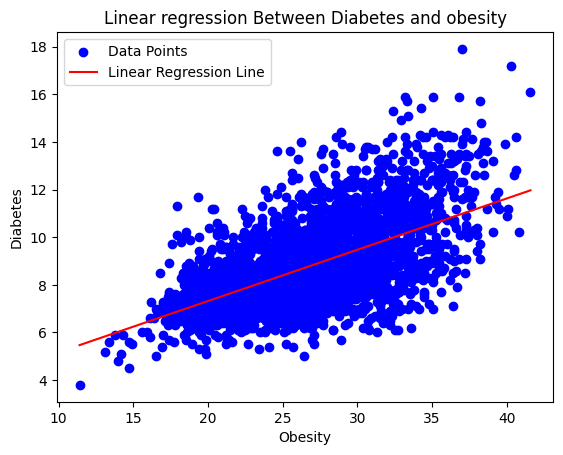

In [85]:
# Create a scatter plot between %diabetes and %inactivity
plt.scatter(obesityArray, diabetesArray, c='blue', marker='o', label='Data Points')



slope, intercept = np.polyfit(obesityArray, diabetesArray, 1)

# Add a linear regression line
regression_line = [slope * x + intercept for x in obesityArray]
plt.plot(obesityArray, regression_line, color='red', label='Linear Regression Line')



# Add labels and a title
plt.xlabel('Obesity')
plt.ylabel('Diabetes')
plt.title('Linear regression Between Diabetes and obesity')
# plt.ylim(2, 12)
# Add a legend (if needed)
plt.legend()

# Display the plot
plt.show()

In [77]:
# Calculate r square value's

# it is important to convert normal array's to numpy's array
inactivityArray = np.array(obesityArray)
diabetesArray = np.array(diabetesArray)



slope, intercept = np.polyfit(inactivityArray, diabetesArray, 1)



# Calculate the predicted values
predicted_values = [slope * x + intercept for x in inactivityArray]

# Calculate the residuals
residuals = diabetesArray - predicted_values

# Calculate the total sum of squares (TSS)
mean_array2 = np.mean(diabetesArray)
TSS = np.sum((diabetesArray - mean_array2) ** 2)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((diabetesArray - predicted_values) ** 2)

# Calculate R-squared (coefficient of determination)
R_squared = 1 - (RSS / TSS)
print(R_squared)

0.3687500219886014
